In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import glob
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def detect(image, template):
    w, h = template.shape[::-1]
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    fig, axes = plt.subplots(1, 6, figsize=(15, 4))
    for i in range(6):
        img = image.copy()
        method = eval(methods[i])
        res = cv.matchTemplate(img, template, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img, top_left, bottom_right, 255, 2)
        axes[i].imshow(img,cmap = 'gray')
    plt.show()

In [56]:
imgs = glob.glob("drive/My Drive/openCV/bio/*.*")
imgs

['drive/My Drive/openCV/bio/2.png',
 'drive/My Drive/openCV/bio/3.png',
 'drive/My Drive/openCV/bio/4.png',
 'drive/My Drive/openCV/bio/5.png',
 'drive/My Drive/openCV/bio/6.png',
 'drive/My Drive/openCV/bio/7.png',
 'drive/My Drive/openCV/bio/messi2.jpg',
 'drive/My Drive/openCV/bio/messi1.jpg',
 'drive/My Drive/openCV/bio/1.png',
 'drive/My Drive/openCV/bio/lab2.ipynb',
 'drive/My Drive/openCV/bio/16.png',
 'drive/My Drive/openCV/bio/15.png',
 'drive/My Drive/openCV/bio/14.jpg',
 'drive/My Drive/openCV/bio/11.jpg',
 'drive/My Drive/openCV/bio/12.jpg']

In [15]:
template = cv.imread(imgs[8],0)

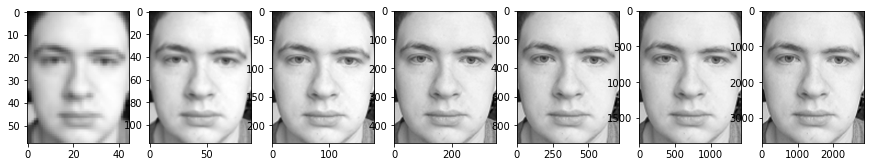

In [80]:
fig, axes = plt.subplots(1, 7, figsize=(15, 4))
up = template.copy()
down = template.copy()
templates = [template] * 7
for i in range(3):
    up = cv.pyrUp(up)
    down = cv.pyrDown(down)
    axes[2-i].imshow(down,cmap = 'gray')
    axes[i+4].imshow(up,cmap = 'gray')
    templates[2-i] = down
    templates[i+4] = up
axes[3].imshow(template,cmap = 'gray')

In [81]:
for i in templates:
    print(i.shape)

(58, 45)
(116, 90)
(231, 179)
(462, 357)
(924, 714)
(1848, 1428)
(3696, 2856)


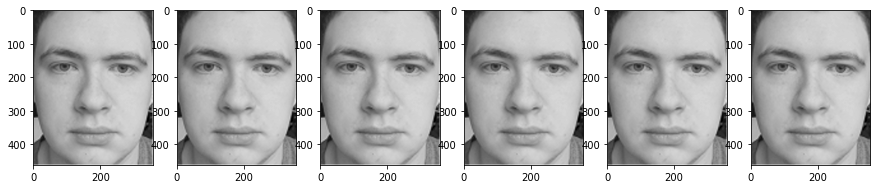

In [83]:
detect(cv.imread(imgs[8],0), template)

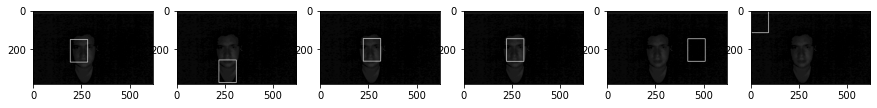

In [85]:
detect(cv.imread(imgs[0],0), templates[1])

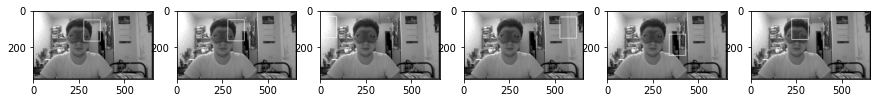

In [86]:
detect(cv.imread(imgs[1],0), templates[1])

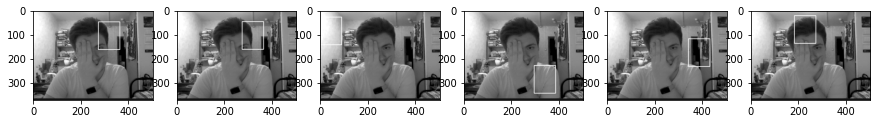

In [119]:
detect(cv.imread(imgs[2],0), templates[2])

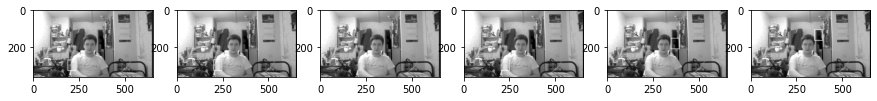

In [90]:
detect(cv.imread(imgs[3],0), templates[0])

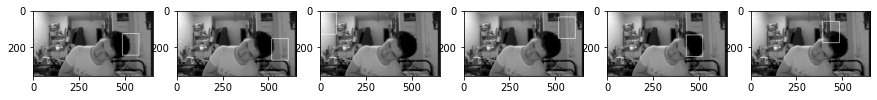

In [91]:
detect(cv.imread(imgs[4],0), templates[1])

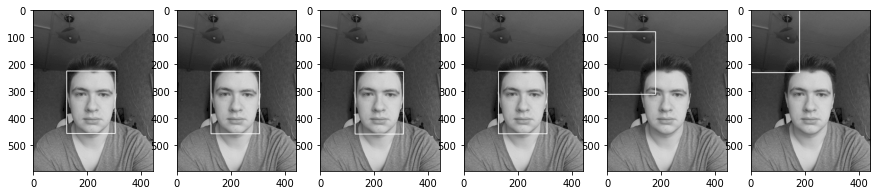

In [93]:
detect(cv.imread(imgs[5],0), templates[2])

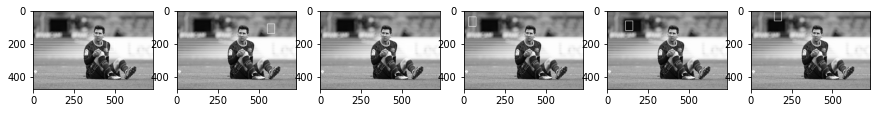

In [121]:
detect(cv.imread(imgs[6],0), templates[0])

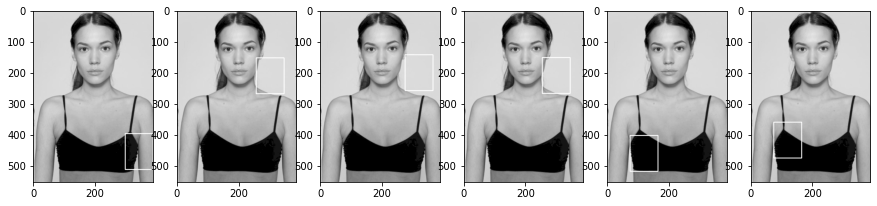

In [105]:
detect(cv.imread(imgs[10],0), templates[1])

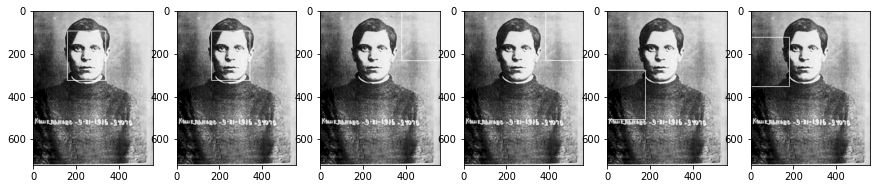

In [107]:
detect(cv.imread(imgs[11],0), templates[2])

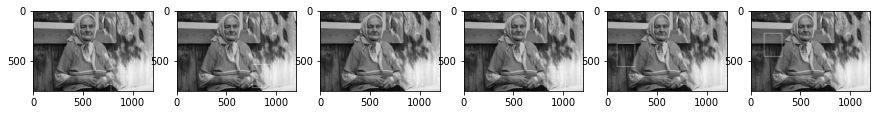

In [112]:
detect(cv.imread(imgs[12],0), templates[2])

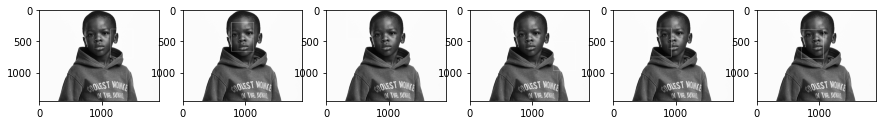

In [115]:
detect(cv.imread(imgs[13],0), templates[3])

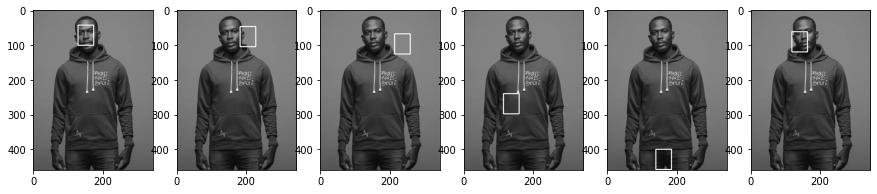

In [118]:
detect(cv.imread(imgs[14],0), templates[0])